In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Para procesar los datos de los archivos csv. Alias = pd
import pandas as pd 
#Para graficar sin los métodos de pandas si es necesario
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

#La ruta de los archivos en la carpeta de drive
rutaEmisiones = "/content/drive/MyDrive/reto/Emisiones_limpio.csv"
rutaComisiones = "/content/drive/MyDrive/reto/Comisiones_limpio.csv"
rutaSiniestros = "/content/drive/MyDrive/reto/Siniestros_limpio.csv"

#El estilo de todas las gráficas
matplotlib.style.use('ggplot')

def cargarArchivo(ruta): #Esta función recibe la ruta de los archivos a analizar y los abre con Pandas
  return pd.read_csv(ruta) 

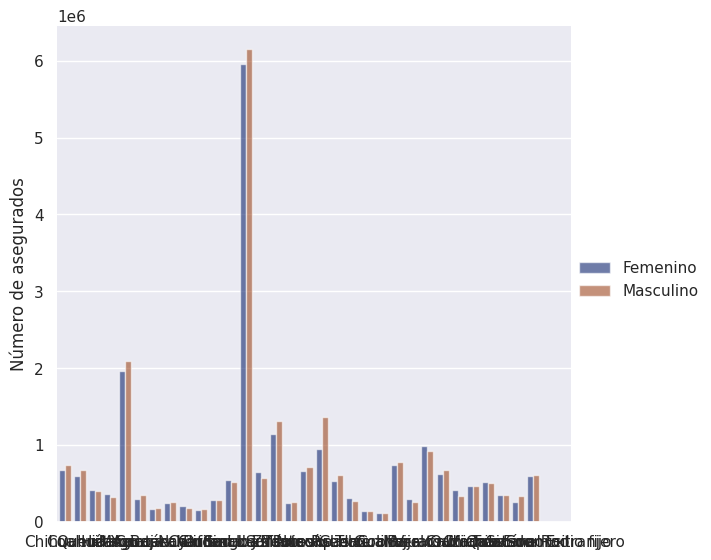

In [ ]:
import seaborn as sns
import pandas as pd


lista = []

entidades = emisiones["ENTIDAD"].unique()

for i in entidades:
    lista.append(["Femenino", i, emisiones[(emisiones["SEXO"] == "Femenino") & (emisiones["ENTIDAD"] == i)]["NUMERO DE ASEGURADOS"].sum()])
    lista.append(["Masculino", i, emisiones[(emisiones["SEXO"] == "Masculino") & (emisiones["ENTIDAD"] == i)]["NUMERO DE ASEGURADOS"].sum()])

new_df = pd.DataFrame(lista, columns=["SEXO", "ENTIDAD", "OCURRENCIAS"])

g = sns.catplot(data=new_df, kind="bar", x="ENTIDAD", y="OCURRENCIAS", hue="SEXO", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Número de asegurados")
g.legend.set_title("")


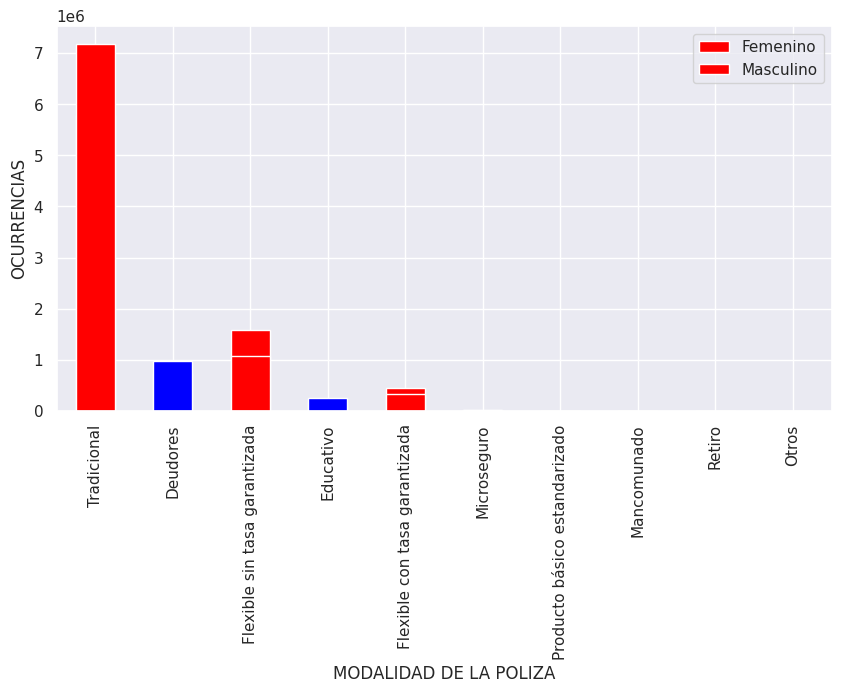

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")


comisiones = cargarArchivo(rutaComisiones)

# Definimos una lista vacía
lista = []

# Obtenemos las diferentes modalidades de poliza
polizas = comisiones["MODALIDAD DE LA POLIZA"].unique()

# Agrupamos los datos por sexo y modalidad de poliza
for i in polizas:
    # Agrupamos los datos por sexo en Femenino
    lista.append(["Femenino", i, comisiones[(comisiones["SEXO"] == "Femenino") & (comisiones["MODALIDAD DE LA POLIZA"] == i)]["NUMERO DE ASEGURADOS"].sum()])
    # Agrupamos los datos por sexo en Masculino
    lista.append(["Masculino", i, comisiones[(comisiones["SEXO"] == "Masculino") & (comisiones["MODALIDAD DE LA POLIZA"] == i)]["NUMERO DE ASEGURADOS"].sum()])

# Creamos un nuevo DataFrame con nuestra lista de valores
new_df = pd.DataFrame(lista, columns=["SEXO", "MODALIDAD DE LA POLIZA", "OCURRENCIAS"]) 

# Creamos un gráfico de barras utilizando el método bar() de matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
new_df.groupby("SEXO").apply(lambda x: x.plot.bar(x="MODALIDAD DE LA POLIZA", y="OCURRENCIAS", ax=ax, legend=False, color=['red', 'blue']))
plt.legend(["Femenino", "Masculino"])
plt.xlabel("MODALIDAD DE LA POLIZA")
plt.ylabel("OCURRENCIAS")
plt.show()
